# Analisis exploratorio


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler

import json


df = pd.read_csv("Titanic-Dataset.csv")

feature_metadata = {}  # Diccionario para guardar metadata

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
import pandas as pd
import numpy as np
import json
from scipy.stats import skew

for col in df.columns:
    col_data = df[col].dropna()
    meta = {}

    # Tipo de dato
    meta["dtype"] = str(df[col].dtype)

    if np.issubdtype(df[col].dtype, np.number):
        meta["count"] = int(col_data.count())
        meta["mean"] = float(col_data.mean())
        meta["std"] = float(col_data.std())
        meta["min"] = float(col_data.min())
        meta["25%"] = float(col_data.quantile(0.25))
        meta["50% (median)"] = float(col_data.median())
        meta["75%"] = float(col_data.quantile(0.75))
        meta["max"] = float(col_data.max())
        meta["skew"] = float(skew(col_data))
    else:
        meta["count"] = int(col_data.count())
        meta["unique"] = int(col_data.nunique())
        meta["top"] = col_data.mode().iloc[0] if not col_data.mode().empty else None
        meta["freq"] = int(col_data.value_counts().iloc[0]) if not col_data.empty else None

    feature_metadata[col] = meta


# Alternativa: mostrar como DataFrame
meta_df = pd.DataFrame(feature_metadata).T
print(meta_df)


               dtype count       mean         std   min     25% 50% (median)  \
PassengerId    int64   891      446.0  257.353842   1.0   223.5        446.0   
Survived       int64   891   0.383838    0.486592   0.0     0.0          0.0   
Pclass         int64   891   2.308642    0.836071   1.0     2.0          3.0   
Name          object   891        NaN         NaN   NaN     NaN          NaN   
Sex           object   891        NaN         NaN   NaN     NaN          NaN   
Age          float64   714  29.699118   14.526497  0.42  20.125         28.0   
SibSp          int64   891   0.523008    1.102743   0.0     0.0          0.0   
Parch          int64   891   0.381594    0.806057   0.0     0.0          0.0   
Ticket        object   891        NaN         NaN   NaN     NaN          NaN   
Fare         float64   891  32.204208   49.693429   0.0  7.9104      14.4542   
Cabin         object   204        NaN         NaN   NaN     NaN          NaN   
Embarked      object   889        NaN   

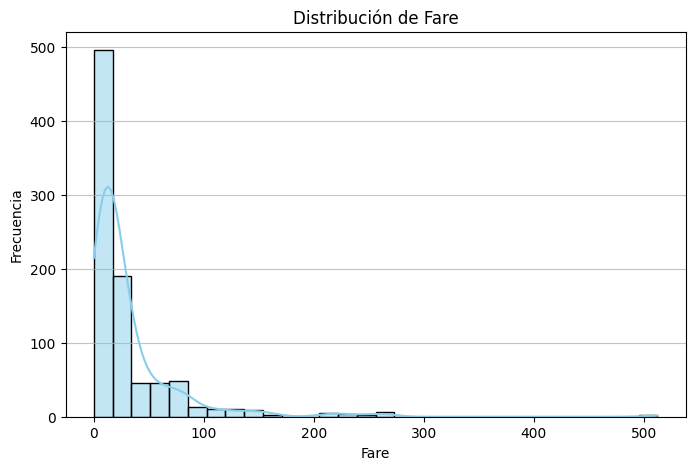

Skewness (asimetría): 4.78
Kurtosis (aplanamiento): 33.20


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Cargar dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Limpiar posibles espacios en los nombres de las columnas
df.columns = df.columns.str.strip()

# Graficar histograma con KDE
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], kde=True, bins=30, color='skyblue')
plt.title('Distribución de Fare')
plt.xlabel('Fare')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Calcular asimetría y curtosis
fare_skew = skew(df['Fare'].dropna())
fare_kurt = kurtosis(df['Fare'].dropna())

print(f"Skewness (asimetría): {fare_skew:.2f}")
print(f"Kurtosis (aplanamiento): {fare_kurt:.2f}")

In [ ]:
# One-hot encoding para categóricas de nuevas variables

# 1. Variables a analizar
features_to_analyze = ["Sex"]
df_subset = df[features_to_analyze].copy()

# 2. Detectar categóricas
categorical_cols = df_subset.select_dtypes(include=["object", "category"]).columns.tolist()

# 3. One-hot encoding de las categóricas en df_subset
df_encoded = pd.get_dummies(df_subset, columns=categorical_cols, drop_first=True)

# 4. Eliminar las columnas originales de df en caso de duplicación
df_merged = df.drop(columns=features_to_analyze, errors="ignore")

# 5. Concatenar df (original sin duplicados) con df_encoded
df_final = pd.concat([df_merged, df_encoded], axis=1)

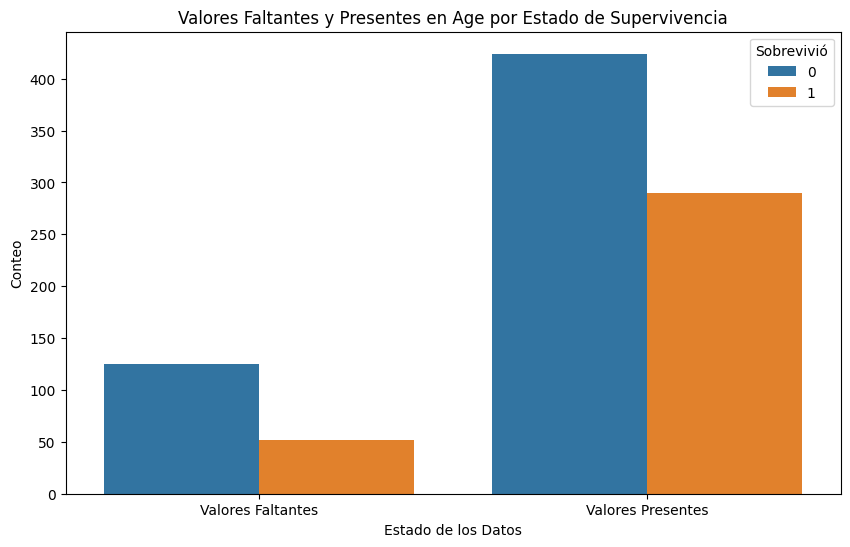

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Contar los valores faltantes y presentes de 'Age' para cada grupo de 'Survived'
missing_data_by_survival = df.groupby('Survived')['Age'].apply(lambda x: x.isnull().sum())
present_data_by_survival = df.groupby('Survived')['Age'].apply(lambda x: x.count())

# Crear un DataFrame para graficar
plot_df = pd.DataFrame({
    'Estado de Datos': ['Valores Faltantes', 'Valores Presentes'] * 2,
    'Sobrevivió': [0, 0, 1, 1],
    'Conteo': [missing_data_by_survival[0], present_data_by_survival[0], missing_data_by_survival[1], present_data_by_survival[1]]
})

# Usar un gráfico de barras agrupadas para una mejor visualización
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='Estado de Datos', y='Conteo', hue='Sobrevivió')

# Añadir etiquetas y título
plt.title('Valores Faltantes y Presentes en Age por Estado de Supervivencia')
plt.xlabel('Estado de los Datos')
plt.ylabel('Conteo')
plt.xticks(rotation=0)

# Guardar el gráfico
plt.savefig('age_missing_data_by_survival_bar_chart.png')

In [ ]:
# Agrupar por género y calcular el promedio de la columna 'Survived'
survival_by_gender = df.groupby('Sex')['Survived'].mean() * 100

print("Porcentaje de supervivencia por género:")
print(survival_by_gender)


Porcentaje de supervivencia por género:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


# Preprocesamiento

               Q1    Q3      IQR    Lower    Upper  Outliers detectados
Survived   0.0000   1.0   1.0000  -1.5000   2.5000                  0.0
Pclass     2.0000   3.0   1.0000   0.5000   4.5000                  0.0
Age       20.1250  38.0  17.8750  -6.6875  64.8125                 11.0
SibSp      0.0000   1.0   1.0000  -1.5000   2.5000                 46.0
Parch      0.0000   0.0   0.0000   0.0000   0.0000                213.0
Fare       7.9104  31.0  23.0896 -26.7240  65.6344                116.0


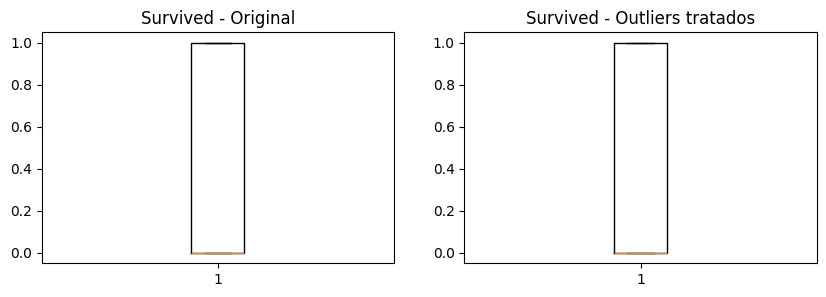

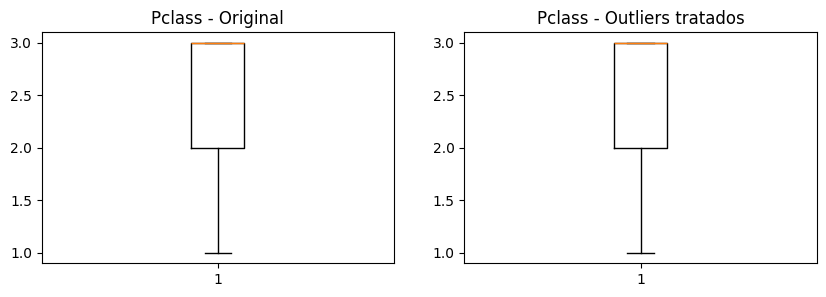

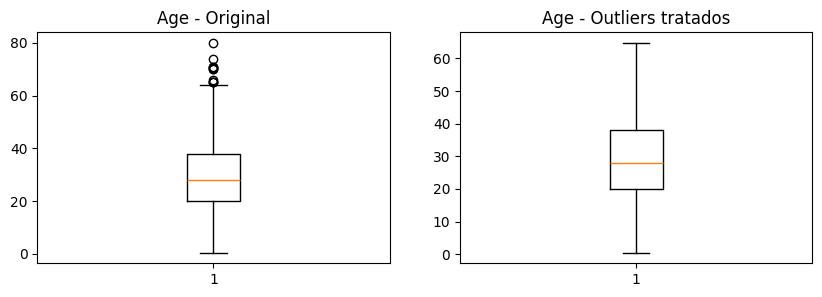

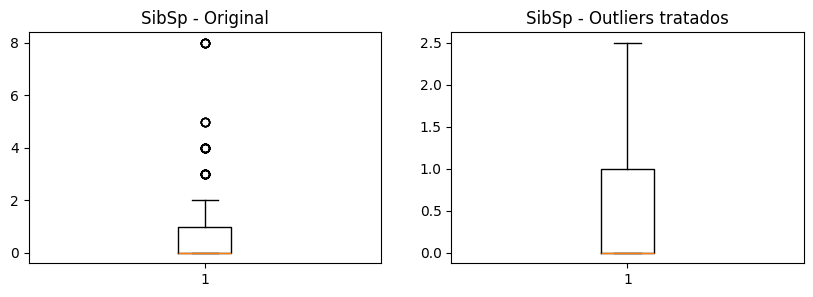

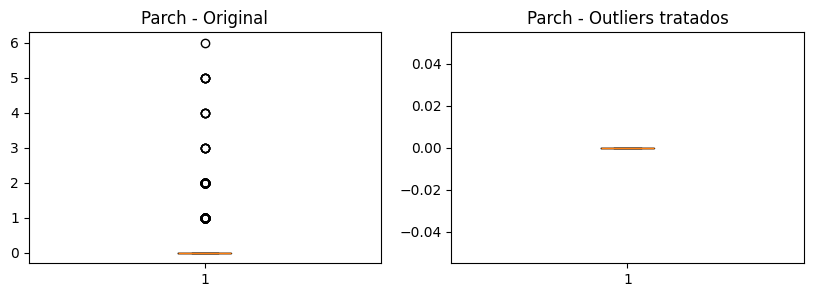

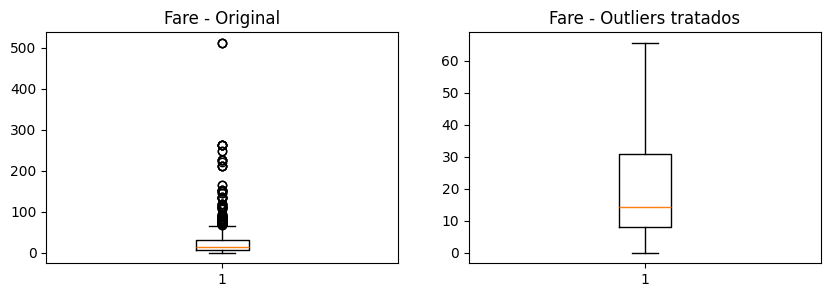

In [ ]:

# 1. Seleccionar columnas numéricas continuas (float64 o int64) excluyendo ID
num_cols = df_final.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_cols = [c for c in num_cols if c != 'PassengerId']  # opcional: excluir ID

# 2. Copiar DataFrame
df_final_outliers = df_final.copy()

# 3. Detección y winsorización con IQR
outlier_summary = {}

for col in num_cols:
    Q1 = df_final_outliers[col].quantile(0.25)
    Q3 = df_final_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Contar outliers
    n_outliers = ((df_final_outliers[col] < lower) | (df_final_outliers[col] > upper)).sum()
    outlier_summary[col] = {
        "Q1": Q1, "Q3": Q3, "IQR": IQR, "Lower": lower, "Upper": upper,
        "Outliers detectados": n_outliers
    }

    # Winsorización
    df_final_outliers[col] = np.where(df_final_outliers[col] < lower, lower,
                                      np.where(df_final_outliers[col] > upper, upper, df_final_outliers[col]))

# 4. Resumen de outliers
outlier_summary_df = pd.DataFrame(outlier_summary).T
print(outlier_summary_df)

# 5. Boxplots antes y después (opcional)
for col in num_cols:
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plt.boxplot(df_final[col].dropna())
    plt.title(f'{col} - Original')
    plt.subplot(1,2,2)
    plt.boxplot(df_final_outliers[col].dropna())
    plt.title(f'{col} - Outliers tratados')
    plt.show()

In [ ]:
# ESCALAR
# 1. Seleccionar variables continuas (float64) excluyendo ID y binarias
continuous_cols = df_final_outliers.select_dtypes(include=['float64']).columns.tolist()
continuous_cols = [c for c in continuous_cols if c not in ['PassengerId']]

# 2. Escalador (elegimos StandardScaler)
scaler = StandardScaler()

# 3. Aplicar escalado
df_scaled = df_final_outliers.copy()
df_scaled[continuous_cols] = scaler.fit_transform(df_scaled[continuous_cols])

# 4. Revisar estadísticas antes y después
print("Antes del escalado:")
print(df_final_outliers[continuous_cols].describe().T[['mean','std','min','max']])
print("\nDespués del escalado:")
print(df_scaled[continuous_cols].describe().T[['mean','std','min','max']])


Antes del escalado:
               mean        std   min      max
Survived   0.383838   0.486592  0.00   1.0000
Pclass     2.308642   0.836071  1.00   3.0000
Age       29.622700  14.316665  0.42  64.8125
SibSp      0.426487   0.708246  0.00   2.5000
Parch      0.000000   0.000000  0.00   0.0000
Fare      24.046813  20.481625  0.00  65.6344

Después del escalado:
                  mean       std       min       max
Survived  3.987333e-17  1.000562 -0.789272  1.266990
Pclass   -8.772133e-17  1.000562 -1.566107  0.827377
Age       1.592253e-16  1.000701 -2.041200  2.459684
SibSp     1.196200e-17  1.000562 -0.602512  2.929318
Parch     0.000000e+00  0.000000  0.000000  0.000000
Fare      9.968332e-17  1.000562 -1.174727  2.031623


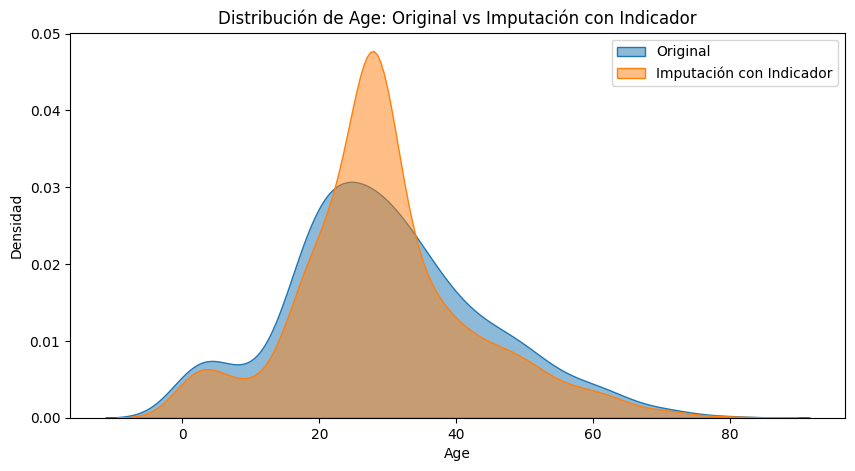

Nulos en Age antes: 177
Nulos en Age después: 0

Tabla comparativa de Media y Mediana:
                    Versión      Media  Mediana
0                  Original  29.699118     28.0
1  Imputación con Indicador  29.361582     28.0


In [ ]:
#####################
# Método de Indicador
#####################

from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Crear copia para este método
df_indicator = df.copy()

# Crear columna binaria indicando missingness
df_indicator['Age_missing'] = df_indicator['Age'].isna().astype(int)

# Imputación simple (mediana) para Age
num_imputer = SimpleImputer(strategy='median')
df_indicator['Age'] = num_imputer.fit_transform(df_indicator[['Age']])

# Visualización: Original vs Imputación con Indicador
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Age'], label='Original', fill=True, alpha=0.5)
sns.kdeplot(df_indicator['Age'], label='Imputación con Indicador', fill=True, alpha=0.5)
plt.title('Distribución de Age: Original vs Imputación con Indicador')
plt.xlabel('Age')
plt.ylabel('Densidad')
plt.legend()
plt.show()

print("Nulos en Age antes:", df['Age'].isna().sum())
print("Nulos en Age después:", df_indicator['Age'].isna().sum())

# Tabla con estadísticas antes y después
stats_indicator = pd.DataFrame({
    'Versión': ['Original', 'Imputación con Indicador'],
    'Media': [df['Age'].mean(skipna=True), df_indicator['Age'].mean()],
    'Mediana': [df['Age'].median(skipna=True), df_indicator['Age'].median()]
})

print("\nTabla comparativa de Media y Mediana:")
print(stats_indicator)

# Transformación de variables

In [ ]:
# === IMPORTS ===
import pandas as pd
import numpy as np

# === CARGAR DATOS ===
df = pd.read_csv("Titanic-Dataset.csv")

# === ACOMPAÑADO ===
df["Acompanado"] = np.where((df["SibSp"] + df["Parch"]) > 0, 1, 0)

# === SEXO ===
# mujeres = 2 (más prioridad), hombres = 1
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# === EDAD ===
df["Age"].fillna(df["Age"].median(), inplace=True)

def age_group(age):
    if age <= 12:
        return "Niño"
    else:
      return "Otro"

df["AgeGroup"] = df["Age"].apply(age_group)

age_mapping = {
    "Niño": 1,
    "Otro": 0
}
df["AgeGroup"] = df["AgeGroup"].map(age_mapping)
pclass_mapping = {
    1: 3,
    2: 2,
    3: 1
}
df["Pclass"]=df["Pclass"].map(pclass_mapping)
# === VARIABLES FINALES ===
data = df[["AgeGroup", "Sex", "Acompanado", "Pclass", "Survived"]]

# === GUARDAR CSV TRANSFORMADO ===
data.to_csv("Titanic-Dataset-Transformado.csv", index=False)

print("CSV transformado guardado como 'Titanic-Dataset-Transformado.csv'")
print("\nPrimeras filas del CSV transformado:")
print(data.head())


CSV transformado guardado como 'Titanic-Dataset-Transformado.csv'

Primeras filas del CSV transformado:
   AgeGroup  Sex  Acompanado  Pclass  Survived
0         0    0           1       1         0
1         0    1           1       3         1
2         0    1           0       1         1
3         0    1           1       3         1
4         0    0           0       1         0


/tmp/ipython-input-2862531495.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


# Modelos

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/tmp/ipython-input-2787630897.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_scaled["Fare"].fillna(df_scaled["Fare"].median(), inplace=True)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)



=== Mejores hiperparámetros ===
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

=== Métricas del Mejor Random Forest ===
Accuracy: 0.8659217877094972
ROC-AUC: 0.9071805006587615

Matriz de confusión:
 [[94 16]
 [ 8 61]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.92      0.85      0.89       110
           1       0.79      0.88      0.84        69

    accuracy                           0.87       179
   macro avg       0.86      0.87      0.86       179
weighted avg       0.87      0.87      0.87       179



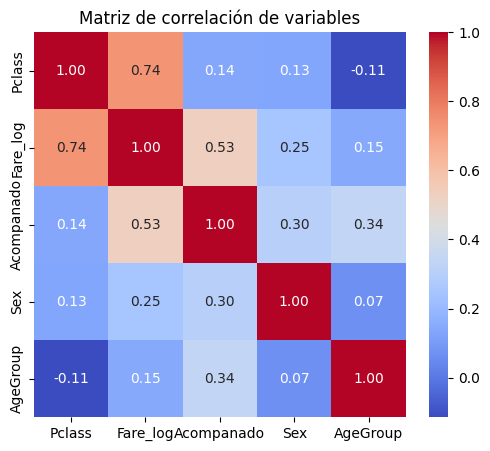

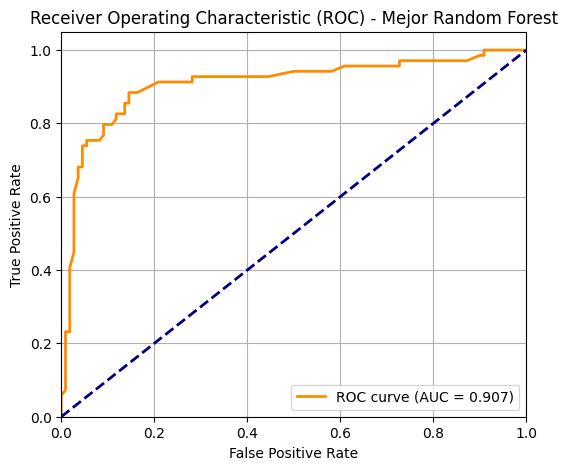

In [ ]:
# === IMPORTS ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
)
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# === CARGAR DATASETS ===
df_scaled = pd.read_csv("df_scaled.csv")  # Para obtener Fare
df = pd.read_csv("Titanic-Dataset-Transformado.csv")   # Para obtener las demás columnas

# === SOLO TRANSFORMACIÓN DE FARE_LOG ===
df_scaled["Fare"].fillna(df_scaled["Fare"].median(), inplace=True)
df["Fare_log"] = np.log1p(df_scaled["Fare"])

# === DEFINIR VARIABLES PARA EL MODELO ===
data = df[["Pclass", "Fare_log", "Acompanado", "Sex", "Survived", "AgeGroup"]]
X = data[["Pclass", "Fare_log", "Acompanado", "Sex", "AgeGroup"]]
y = data["Survived"].astype(int)

# === IMPUTACIÓN POR SI HAY NAN ===
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

# === TRAIN/TEST SPLIT ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3006204, stratify=y
)

# === GRID SEARCH PARA RANDOM FOREST ===
rf = RandomForestClassifier(random_state=3006204, class_weight="balanced")

# Hiperparámetros a usar (exactos)
param_grid = {
    'n_estimators': [200],
    'max_depth': [None],
    'max_features': ['sqrt'],
    'min_samples_split': [10],
    'min_samples_leaf': [1]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# === MEJOR MODELO ===
best_rf = grid_search.best_estimator_
print("\n=== Mejores hiperparámetros ===")
print(grid_search.best_params_)

# === PREDICCIONES CON EL MEJOR MODELO ===
y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:, 1]

# === MÉTRICAS ===
print("\n=== Métricas del Mejor Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_best))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_best))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_best))

# === MATRIZ DE CORRELACIÓN ===
plt.figure(figsize=(6,5))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación de variables")
plt.show()

# === CALCULAR ROC CURVE ===
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best)
roc_auc = auc(fpr, tpr)

# === GRAFICAR ROC ===
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Mejor Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
# === RANDOM FOREST POR CADA VARIABLE + ACOMPANADO CON HIPERPARÁMETROS ESPECÍFICOS ===

variables = ["Pclass", "Fare_log", "Sex", "AgeGroup"]
resultados = []

# Hiperparámetros específicos
rf_params = {
    'n_estimators': 200,
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_split': 10,
    'min_samples_leaf': 1,
    'random_state': 3006204,
    'class_weight': 'balanced'
}

for var in variables:
    # Selección de columnas
    X_var = data[[var, "Acompanado"]]
    y = data["Survived"].astype(int)

    # Imputación
    X_var_imputed = imputer.fit_transform(X_var)
    X_var = pd.DataFrame(X_var_imputed, columns=X_var.columns)

    # Split
    X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(
        X_var, y, test_size=0.2, random_state=3006204, stratify=y
    )

    # Modelo con hiperparámetros específicos
    rf_var = RandomForestClassifier(**rf_params)
    rf_var.fit(X_train_v, y_train_v)

    # Predicciones
    y_prob_v = rf_var.predict_proba(X_test_v)[:, 1]
    y_pred_v = rf_var.predict(X_test_v)

    # Métricas
    acc = accuracy_score(y_test_v, y_pred_v)
    auc_score = roc_auc_score(y_test_v, y_prob_v)

    # Importancia de variables
    feat_importances_v = pd.DataFrame({
        "Variable": X_var.columns,
        "Importancia": rf_var.feature_importances_
    }).sort_values(by="Importancia", ascending=False)

    # Guardar resultados
    resultados.append({
        "Variables": f"{var} + Acompanado",
        "Accuracy": acc,
        "ROC-AUC": auc_score,
        "Importancia": feat_importances_v.set_index("Variable").to_dict()["Importancia"]
    })

# === RESUMEN FINAL ===
resumen = pd.DataFrame(resultados)
print("\n=== Resumen de modelos (Variable + Acompanado) ===")
print(resumen[["Variables", "Accuracy", "ROC-AUC"]])



=== Resumen de modelos (Variable + Acompanado) ===
               Variables  Accuracy   ROC-AUC
0    Pclass + Acompanado  0.698324  0.725296
1  Fare_log + Acompanado  0.642458  0.709025
2       Sex + Acompanado  0.826816  0.852503
3  AgeGroup + Acompanado  0.636872  0.634519


In [ ]:
# === RANDOM FOREST POR CADA VARIABLE INDIVIDUAL (SIN ACOMPANADO) ===

resultados_sin_acomp = []

for var in variables:
    # Selección de columna individual
    X_var = data[[var]]
    y = data["Survived"].astype(int)

    # Imputación
    X_var_imputed = imputer.fit_transform(X_var)
    X_var = pd.DataFrame(X_var_imputed, columns=X_var.columns)

    # Split
    X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(
        X_var, y, test_size=0.2, random_state=3006204, stratify=y
    )

    # Modelo con hiperparámetros específicos
    rf_var = RandomForestClassifier(**rf_params)
    rf_var.fit(X_train_v, y_train_v)

    # Predicciones
    y_prob_v = rf_var.predict_proba(X_test_v)[:, 1]
    y_pred_v = rf_var.predict(X_test_v)

    # Métricas
    acc = accuracy_score(y_test_v, y_pred_v)
    auc_score = roc_auc_score(y_test_v, y_prob_v)

    # Guardar resultados
    resultados_sin_acomp.append({
        "Variable": var,
        "Accuracy": acc,
        "ROC-AUC": auc_score
    })

# === RESUMEN FINAL ===
resumen_sin_acomp = pd.DataFrame(resultados_sin_acomp)
print("\n=== Resumen de modelos (Variable individual, sin Acompanado) ===")
print(resumen_sin_acomp)


=== Resumen de modelos (Variable individual, sin Acompanado) ===
   Variable  Accuracy   ROC-AUC
0    Pclass  0.648045  0.672727
1  Fare_log  0.670391  0.726087
2       Sex  0.826816  0.813175
3  AgeGroup  0.625698  0.536100


In [ ]:
# === RANDOM FOREST POR CADA VARIABLE + FARE ===

resultados_con_fare = []

for var in variables:
    # Selección de columna junto con Fare
    X_var = data[[var, "Fare_log"]]
    y = data["Survived"].astype(int)

    # Imputación
    X_var_imputed = imputer.fit_transform(X_var)
    X_var = pd.DataFrame(X_var_imputed, columns=X_var.columns)

    # Split
    X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(
        X_var, y, test_size=0.2, random_state=3006204, stratify=y
    )

    # Modelo con hiperparámetros específicos
    rf_var = RandomForestClassifier(**rf_params)
    rf_var.fit(X_train_v, y_train_v)

    # Predicciones
    y_prob_v = rf_var.predict_proba(X_test_v)[:, 1]
    y_pred_v = rf_var.predict(X_test_v)

    # Métricas
    acc = accuracy_score(y_test_v, y_pred_v)
    auc_score = roc_auc_score(y_test_v, y_prob_v)

    # Guardar resultados
    resultados_con_fare.append({
        "Variable": f"{var} + Fare",
        "Accuracy": acc,
        "ROC-AUC": auc_score
    })

# === RESUMEN FINAL ===
resumen_con_fare = pd.DataFrame(resultados_con_fare)
print("\n=== Resumen de modelos (Variable + Fare) ===")
print(resumen_con_fare)


=== Resumen de modelos (Variable + Fare) ===
          Variable  Accuracy   ROC-AUC
0    Pclass + Fare  0.664804  0.740711
1  Fare_log + Fare  0.670391  0.726087
2       Sex + Fare  0.804469  0.861133
3  AgeGroup + Fare  0.631285  0.691502


## Regresión Logística

Accuracy: 0.8324022346368715

Matriz de confusión:
 [[96 14]
 [16 53]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       110
           1       0.79      0.77      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


Coeficientes del modelo:
     Variable  Coeficiente
0      Pclass     1.009110
1    Fare_log    -0.024263
2  Acompanado    -0.196835
3         Sex     2.446313
4    AgeGroup     1.109127


/tmp/ipython-input-3287040697.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_scaled["Fare"].fillna(df_scaled["Fare"].median(), inplace=True)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


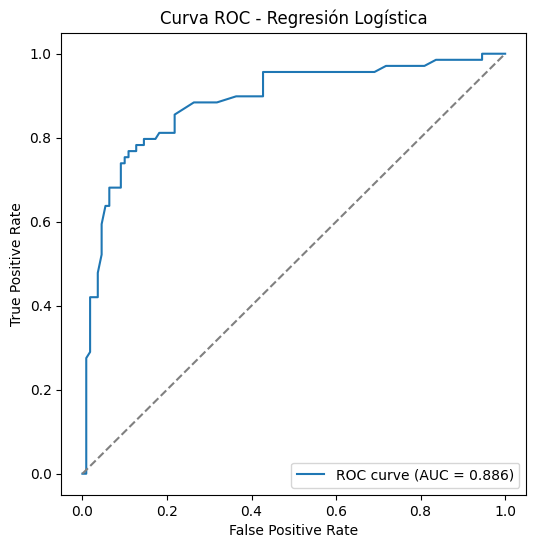

AUC del modelo: 0.8859683794466403


In [ ]:
# MODELO CON ACOMPAÑAMIENTO
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

# 1. Crear df_final
df_final = df.copy()

# === SOLO TRANSFORMACIÓN DE FARE_LOG ===
df_scaled["Fare"].fillna(df_scaled["Fare"].median(), inplace=True)
df["Fare_log"] = np.log1p(df_scaled["Fare"])

# === DEFINIR VARIABLES PARA EL MODELO ===
data = df[["Pclass", "Fare_log", "Acompanado", "Sex", "Survived", "AgeGroup"]]
X = data[["Pclass", "Fare_log", "Acompanado", "Sex", "AgeGroup"]]
y = data["Survived"].astype(int)

# === IMPUTACIÓN POR SI HAY NAN ===
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

# === TRAIN/TEST SPLIT ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3006204, stratify=y
)

# 4. Modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


# 5. Predicciones
y_pred = log_reg.predict(X_test)


# 6. Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))


# 7. Coeficientes del modelo
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': log_reg.coef_[0]
})
print("\nCoeficientes del modelo:")
print(coef_df)

def plot_roc(model, X_test, y_test):
    # Probabilidades de la clase positiva
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calcular fpr, tpr y thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    # Graficar
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.3f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC - Regresión Logística")
    plt.legend(loc="lower right")
    plt.show()

    return auc_score

# =========================
# Llamar la función
# =========================
auc_score = plot_roc(log_reg, X_test, y_test)
print("AUC del modelo:", auc_score)

Accuracy: 0.8379888268156425

Matriz de confusión:
 [[97 13]
 [16 53]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       110
           1       0.80      0.77      0.79        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179


Coeficientes del modelo:
   Variable  Coeficiente
0    Pclass     1.068654
1  Fare_log    -0.109568
2       Sex     2.416110
3  AgeGroup     1.057407


/tmp/ipython-input-3684138581.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_scaled["Fare"].fillna(df_scaled["Fare"].median(), inplace=True)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


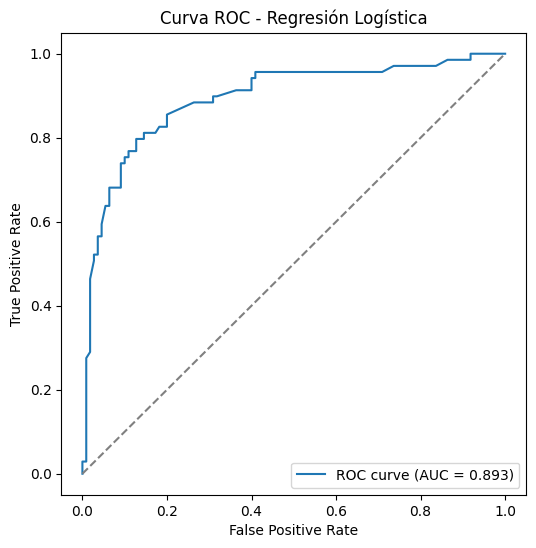

AUC del modelo: 0.8929512516469038


In [ ]:
# MODELO CON ACOMPAÑAMIENTO
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

# 1. Crear df_final
df_final = df.copy()

# === SOLO TRANSFORMACIÓN DE FARE_LOG ===
df_scaled["Fare"].fillna(df_scaled["Fare"].median(), inplace=True)
df["Fare_log"] = np.log1p(df_scaled["Fare"])

# === DEFINIR VARIABLES PARA EL MODELO ===
data = df[["Pclass", "Fare_log", "Sex", "Survived", "AgeGroup"]]
X = data[["Pclass", "Fare_log", "Sex", "AgeGroup"]]
y = data["Survived"].astype(int)

# === IMPUTACIÓN POR SI HAY NAN ===
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

# === TRAIN/TEST SPLIT ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3006204, stratify=y
)

# 4. Modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


# 5. Predicciones
y_pred = log_reg.predict(X_test)


# 6. Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))


# 7. Coeficientes del modelo
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': log_reg.coef_[0]
})
print("\nCoeficientes del modelo:")
print(coef_df)

def plot_roc(model, X_test, y_test):
    # Probabilidades de la clase positiva
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calcular fpr, tpr y thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    # Graficar
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.3f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC - Regresión Logística")
    plt.legend(loc="lower right")
    plt.show()

    return auc_score

# =========================
# Llamar la función
# =========================
auc_score = plot_roc(log_reg, X_test, y_test)
print("AUC del modelo:", auc_score)

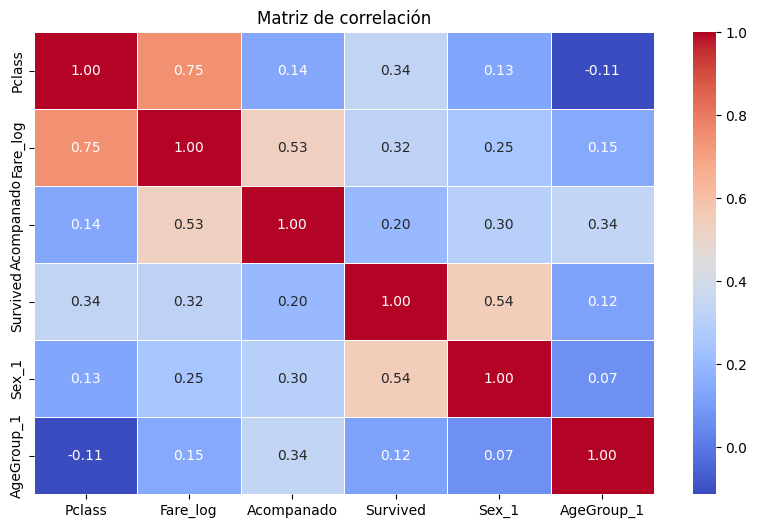

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Seleccionar solo las variables del modelo
data = df[["Pclass", "Fare_log", "Acompanado", "Sex", "Survived", "AgeGroup"]]

# 2. Convertir categóricas en variables dummy (one-hot encoding)
data_encoded = pd.get_dummies(data, columns=["Sex", "AgeGroup"], drop_first=True)

# 3. Calcular matriz de correlación
corr_matrix = data_encoded.corr()

# 4. Graficar con mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()